In [1]:
import csv
import pandas as pd
import re
import numpy
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
data = pd.read_csv("packData.csv")

data.head()

,Pack Art,Weight (g),Width (mm),Code Color,Hit?,Hit Type
0,r,22.3,3.691,g,n,0
1,d,22.3,3.689,g,n,0
2,r,22.4,3.658,w,y,g
3,s,22.3,3.691,g,n,0
4,s,22.3,3.698,g,n,0


In [5]:
data["Hit?"] = pd.Categorical(data["Hit?"]).codes
data.head()

,Pack Art,Weight (g),Width (mm),Code Color,Hit?,Hit Type
0,r,22.3,3.691,g,0,0
1,d,22.3,3.689,g,0,0
2,r,22.4,3.658,w,1,g
3,s,22.3,3.691,g,0,0
4,s,22.3,3.698,g,0,0


In [6]:
y = data["Hit?"]
X = data.drop(labels = ["Code Color", "Hit?", "Hit Type", "Pack Art"],axis = 1) 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=10)
X_train.head()

,Weight (g),Width (mm)
160,22.3,3.690
196,22.3,3.702
159,22.3,3.685
132,22.3,3.649
80,22.3,3.649


C:\Users\vin99\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


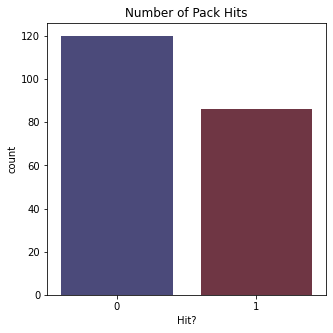

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# visualize number of digits classes
plt.figure(figsize=(5,5))
g = sns.countplot(y_train, palette="icefire")
plt.title("Number of Pack Hits")
y_train.value_counts();

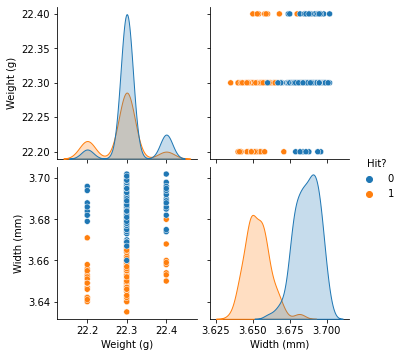

In [8]:
sns.pairplot(data, hue='Hit?', vars=['Weight (g)', 'Width (mm)']);

Gaussian Naive Bayes Classification
Number of mislabeled points out of a total 52 points: 2
Accuracy: 0.961538


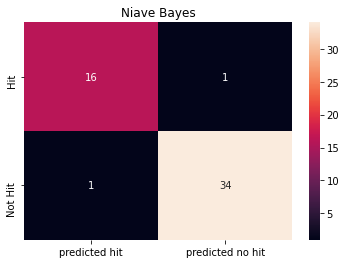

In [10]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
nb_model = GaussianNB()
predictions_nb = nb_model.fit(X_train,y_train).predict(X_test)
print("Gaussian Naive Bayes Classification")
print("Number of mislabeled points out of a total %d points: %d" % (len(X_test), (y_test != predictions_nb).sum()))
print("Accuracy: %f" % (1-(((y_test != predictions_nb).sum())/len(X_test))))

cm = np.array(confusion_matrix(y_test, predictions_nb, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['Hit', 'Not Hit'],
                         columns=['predicted hit','predicted no hit'])
sns.heatmap(confusion, annot=True)
plt.title("Niave Bayes");

In [54]:
misclassified = np.where(y_test != predictions_nb)

(array([28, 47], dtype=int64),)

Decision Tree Classification (max depth =5)
Number of mislabeled points out of a total 52 points: 3
Accuracy: 0.942308


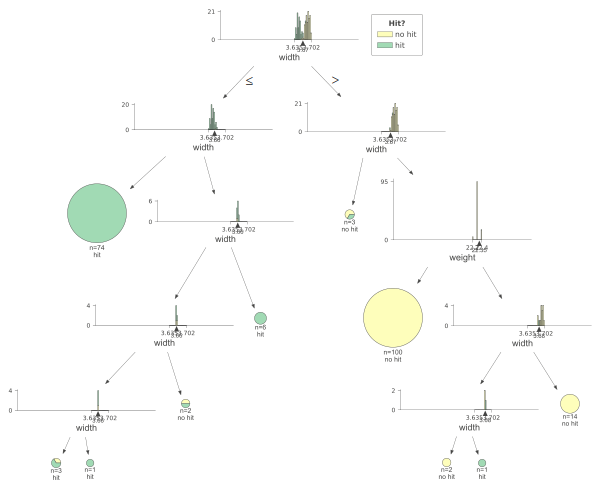

In [16]:
from sklearn import tree
from dtreeviz.trees import *
import dtreeviz as dtviz


max_depth = 5
clf_dt = tree.DecisionTreeClassifier(max_depth=max_depth)
clf_dt = clf_dt.fit(X_train, y_train)
#plt.figure(figsize=(35,12))
#tree.plot_tree(clf_dt,feature_names=columns,class_names=['loss','win'],rounded=True,fontsize=8);
#plt.show()
predictions_dt = clf_dt.predict(X_test)
accuracy = 1-(((y_test != predictions_dt).sum())/len(X_test))
print("Decision Tree Classification (max depth =" + str(max_depth) + ")")
print("Number of mislabeled points out of a total %d points: %d" % (len(X_test), (y_test != predictions_dt).sum()))
print("Accuracy: %f" % (accuracy))

viz = dtviz.trees.dtreeviz(clf_dt,
                   X_train,
                   y_train,
                   target_name='Hit?',
                   feature_names=["weight", "width"],
                   orientation="TD",
                   class_names=['no hit','hit'],
                   fancy=True,
                   X=None,
                   fontname="Arial")

viz

In [40]:
data_text = pd.read_csv("texturedPackOnlyHits.csv")

data_text.head()

y2 = data_text["Textured Hit?"]
X2 = data_text.drop(labels = ["Textured Hit?"],axis = 1) 

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.25, random_state=10)
X_train2.head()

,Weight (g),Width (mm)
70,22.3,3.657
59,22.3,3.669
21,22.3,3.640
71,22.3,3.655
6,22.4,3.680


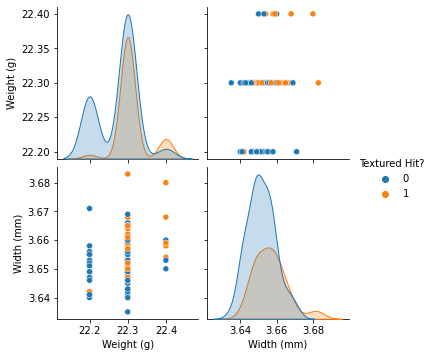

In [43]:
sns.pairplot(data_text, hue='Textured Hit?', vars=['Weight (g)', 'Width (mm)']);

C:\Users\vin99\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


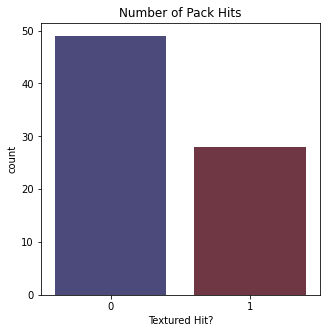

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# visualize number of digits classes
plt.figure(figsize=(5,5))
g = sns.countplot(y_train2, palette="icefire")
plt.title("Number of Pack Hits")
y_train2.value_counts();

Gaussian Naive Bayes Classification
Number of mislabeled points out of a total 26 points: 7
Accuracy: 0.730769


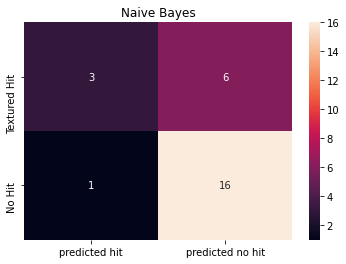

In [42]:
nb_model2 = GaussianNB()
predictions_nb2 = nb_model2.fit(X_train2,y_train2).predict(X_test2)
print("Gaussian Naive Bayes Classification")
print("Number of mislabeled points out of a total %d points: %d" % (len(X_test2), (y_test2 != predictions_nb2).sum()))
print("Accuracy: %f" % (1-(((y_test2 != predictions_nb2).sum())/len(X_test2))))

cm = np.array(confusion_matrix(y_test2, predictions_nb2, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['Textured Hit', 'No Hit'],
                         columns=['predicted hit','predicted no hit'])
sns.heatmap(confusion, annot=True)
plt.title("Naive Bayes");